In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from scipy import stats
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas import datetime
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from arch import arch_model
from sklearn.metrics import mean_squared_error

In [2]:
consump_o = pd.read_csv("C:/Users/arito/Documents/DePaul/DSC672/Daily Aggregated Files/consump_agg_sectors/consump_o_daily_agg.csv")

In [3]:
consump_o['Date_Time'] = pd.to_datetime(consump_o['Date_Time'])
consump_o_ind = consump_o.set_index('Date_Time')

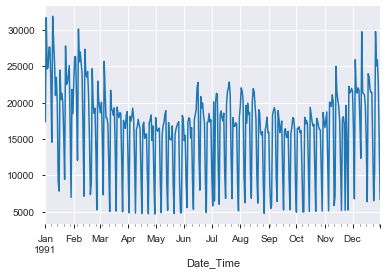

In [4]:
consump_o_ind['Electricity_KW_AVG'].plot(linewidth=1.5)

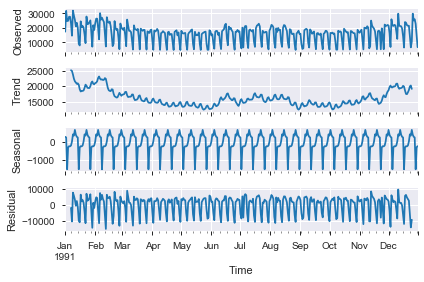

In [5]:
result = seasonal_decompose(consump_o_ind['Electricity_KW_AVG'], freq=12)
result.plot()
plt.xlabel("Time")
pyplot.show()

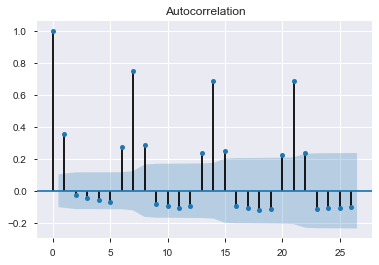

In [6]:
sm.graphics.tsa.plot_acf(consump_o_ind['Electricity_KW_AVG'].values.squeeze())
plt.show()

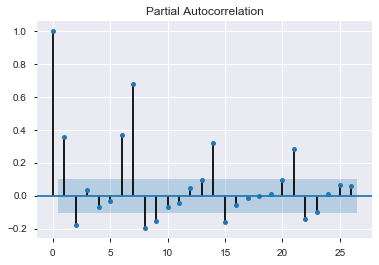

In [7]:
sm.graphics.tsa.plot_pacf(consump_o_ind['Electricity_KW_AVG'].values.squeeze())
plt.show()

In [8]:
consump_o_time = consump_o.iloc[:,0:2]
consump_o_time.head()

,Date_Time,Electricity_KW_AVG
0,1991-01-01,17339.92645
1,1991-01-02,31683.39127
2,1991-01-03,24630.05443
3,1991-01-04,24832.61941
4,1991-01-05,27620.44663


In [9]:
consump_o_x = consump_o.iloc[:,2:]
consump_o_x.head()

,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Precipitable_Water_AVG,Temperature_AVG,Visibility_AVG,...,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,1,1,0,-18.476732,0.950000,-12.883333,0.763750,5.208333,-9.441667,8.470833,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,-18.411217,0.458333,-14.670833,0.679583,4.833333,-9.570833,16.100000,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,-18.339779,0.583333,-11.320833,0.610417,5.583333,-4.670833,16.100000,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,-18.262442,0.862500,-13.825000,0.746250,5.083333,-10.016667,8.725000,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,-18.179237,0.554167,-20.070833,0.757083,3.833333,-16.716667,10.675000,...,0,0,0,0,1,0,0,0,0,1


In [35]:
train_time = np.array(consump_o_time.Electricity_KW_AVG[0:292])
test_time = np.array(consump_o_time.Electricity_KW_AVG[292:])
train_exo = np.array(consump_o_x[0:292])
test_exo = np.array(consump_o_x[292:])

In [36]:
model = SARIMAX(train_time, exog=train_exo, order=(5, 1, 1), seasonal_order=(0, 0, 0, 0))

In [37]:
model_fit = model.fit(disp=True)

C:\Users\arito\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [38]:
fc = model_fit.forecast(73, alpha=0.05, exog = pd.DataFrame(test_exo))
fc

array([17722.6109324 , 11557.65914752,  4683.22544358, 18031.63559623,
       17565.96222395, 18486.10274068, 18199.12450168, 18748.49464013,
       11069.38737407,  4522.23997743, 19454.32710015, 17785.01215984,
       22798.37602745, 22038.55013262, 22372.06663205, 15296.40411923,
        9728.61551948, 24514.59230947, 23425.08812296, 22219.17029524,
       22680.24145246, 10640.70229432, 15793.64998306,  9349.9340804 ,
       23516.48914731, 24371.86826757, 23017.25352641, 23048.29734909,
       23241.94198629, 15885.05763339,  9810.4103766 , 22368.39854437,
       22735.68343893, 22202.21820067, 10559.26388904, 21603.52566917,
       15231.77983539,  9321.07772618, 23395.52944179, 22677.00941115,
       21801.12219576, 23531.95107848, 24227.93846059, 16399.51489945,
       10806.97892877, 24383.44887443, 23154.72475453, 24913.70329027,
       24816.93301761, 23455.45137946, 17111.86260471, 11217.47430013,
       24473.15478917, 22557.19221271, 23751.22510669, 25168.62929407,
      

In [39]:
actual = pd.DataFrame(test_time)
actual.index = consump_o_time[292:].index
forecast = pd.DataFrame(fc)
forecast.index = actual.index

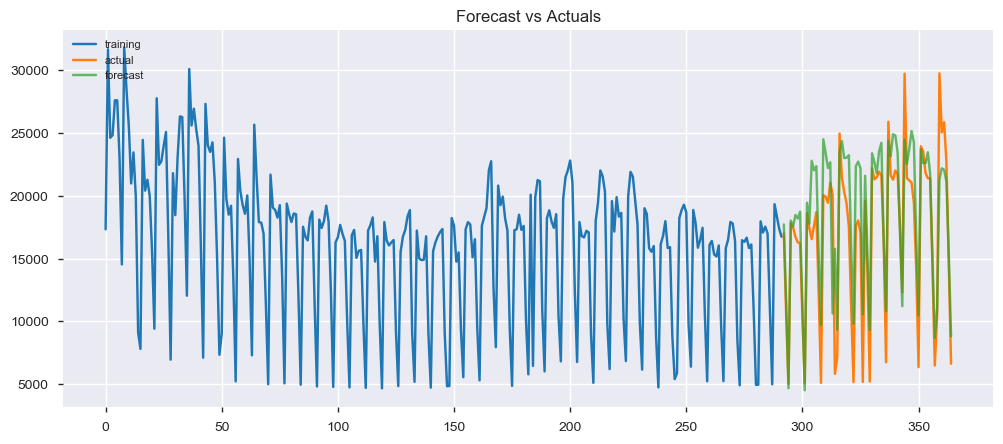

In [40]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_time, label='training')
plt.plot(actual, label='actual')
plt.plot(forecast, label='forecast', alpha = 0.7)
#plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [41]:
mse = mean_squared_error(actual.values, forecast.values)
rmse = np.sqrt(mse)
print(rmse)
from sklearn.metrics import explained_variance_score
r2 = explained_variance_score(actual.values, forecast.values)
print(r2)

3423.2555573793034
0.7723315411152764
